I decided to do some research on the government procurement market, and specifically the furniture procurement market in Moscow, for which I collected 2 datasets from the site https://zakupki.kontur.ru/Grid?WelcomeView=True using two different procedures. The first for auctions, the second for competitions. I attached the datasets themselves on the github, but if you want to download them, you need to register on the site and click on the "show advanced search" button in the search field and enter the following parameters: Delivery region - Moscow, Industry - furniture (in the drop-down menu on the bottom left), stage - just completed, type of auction - 44-FZ (94-FZ), selection method - for the first table - competition, for the second - auction, published - for competitions from January 1, 2014, for auctions - from 11/22/2019 to 08/06. 2020, for competitions - from 02/01/2014 to 06/08/2020. Further on the search on the right, a button will appear to upload to Excel. Thus, we get approximately equal in number of samples. In both datasets, the first row has been removed for convenience.

# Step

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
auk = pd.read_excel('НОД_аукционы.xlsx')
auk.head()

,Номер,Название,НМЦ,Тип торгов,Способ отбора,СМП,Размещает закупку,Регион,Название.1,Название победителя,Предложение победителя,Процент снижения,Участники,Название поставщика,Цена договора
0,373200152820000202,"Поставка медицинских тележек для нужд ГБУЗ ""ГК...",2996649.90,44-ФЗ,Электронный аукцион,Для СМП,7716035705-771601001\nГБУЗ г. Москвы «Городска...,77 Москва,ГБУЗ г. Москвы «Городская Клиническая Больница...,NaN,NaN,NaN,NaN,NaN,NaN
1,173100009820000014,Поставка мебели для нужд УВД по ЮВАО ГУ МВД Ро...,328482.59,44-ФЗ,Электронный аукцион,Для СМП,7723320326-772101001\nУправление Внутренних Де...,77 Москва,Управление Внутренних Дел по Юго-Восточному Ад...,NaN,NaN,NaN,NaN,NaN,NaN
2,373200063120000371,Аукцион в электронной форме на право заключени...,3150930.00,44-ФЗ,Электронный аукцион,Для СМП,7735069192-773501001\nГБУЗ г. Москвы «Городска...,77 Москва,ГБУЗ г. Москвы «Городская Клиническая Больница...,NaN,NaN,NaN,7726░░░░░░; ООО Производственно-Торговая Компа...,NaN,NaN
3,373200188020000072,Поставка кроватей медицинских функциональных п...,9955740.00,44-ФЗ,Электронный аукцион,Для СМП,7703027320-770301001\nГБУЗ г. Москвы «Детская ...,77 Москва,ГБУЗ г. Москвы «Детская Городская Клиническая ...,NaN,NaN,NaN,NaN,NaN,NaN
4,373100046920000033,Поставка офисной мебели,1254787.84,44-ФЗ,Электронный аукцион,NaN,7707671197-773101001\nФедеральное казенное учр...,77 Москва,Федеральное казенное учреждение «Управление Ка...,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
kon = pd.read_excel('НОД_конкурсы.xlsx')
kon.head()

,Номер,Название,НМЦ,Тип торгов,Способ отбора,СМП,Размещает закупку,Регион,Название.1,Название победителя,Предложение победителя,Процент снижения,Участники,Название поставщика,Цена договора
0,273100000620000025,Поставка мебели офисной для обеспечения госуда...,9.094969e+06,44-ФЗ,Открытый конкурс в электронной форме,Для СМП,7703363868-772501001\nГУЧ - Отделение Пенсионн...,77 Москва,ГУЧ - Отделение Пенсионного Фонда РФ по г. Мос...,ООО «Центр Офисной Мебели»,6850000.0,0.246836,7716░░░░░░; ООО «Центр Офисной Мебели»; 685000...,NaN,NaN
1,148200005420000106,Поставка офисной мебели для административного ...,1.590696e+08,44-ФЗ,Открытый конкурс в электронной форме,NaN,5024139723-502401001\nКомитет по Конкурентной ...,50 Московская область,ГБУ Московской обл. «Управление Материально-Те...,ООО «Эффективная Эксплуатация»,122975000.0,0.226911,7728░░░░░░; ООО «Эффективная Эксплуатация»; 12...,ООО «Эффективная Эксплуатация»,1.229750e+08
2,373200307320000134,Открытый конкурс в электронной форме на право ...,6.442754e+06,44-ФЗ,Открытый конкурс в электронной форме,Для СМП,7727656790-771401001\nГБУ г. Москвы «Автомобил...,77 Москва,ГБУ г. Москвы «Автомобильные Дороги»,ООО «Элит-Мебель»,3260000.0,0.494005,"0264░░░░░░; ООО «Элит-Мебель»; 3260000,00\n771...",ООО «Элит-Мебель»,3.260000e+06
3,173100006420000118,"Поставка, сборка и установка офисной мебели дл...",3.285849e+07,44-ФЗ,Открытый конкурс в электронной форме,NaN,7708075454-770801001\nМинистерство Сельского Х...,77 Москва,Министерство Сельского Хозяйства РФ,ООО «Мебельные Инновационные Технологии»,6319172.0,0.000016,5017░░░░░░; ООО «Мебельные Инновационные Техно...,ООО «Мебельные Инновационные Технологии»,3.285849e+07
4,373200041520000243,"Поставка мебели для нужд учреждений, подведомс...",9.294400e+06,44-ФЗ,Открытый конкурс в электронной форме,Для СМП,7701827320-770901001\nГКУ г. Москвы «Дирекция ...,77 Москва,ГКУ г. Москвы «Дирекция по Обеспечению Деятель...,Тихомиров Руслан Анатольевич,9200000.0,0.010157,6910░░░░░░░░; ТИХОМИРОВ РУСЛАН АНАТОЛЬЕВИЧ; 92...,ИП ИП Тихомиров Руслан Анатольевич,9.200000e+06


# Step

We have tables with various information, starting with the application number and ending with the price of the contract, for public procurement in two procedures. Let's analyze the gaps:

In [4]:
auk.isna().sum()

Номер                       0
Название                    0
НМЦ                         0
Тип торгов                  0
Способ отбора               0
СМП                       130
Размещает  закупку          0
Регион                      0
Название.1                  0
Название победителя       294
Предложение победителя    294
Процент снижения          294
Участники                  38
Название поставщика       101
Цена договора             101
dtype: int64

In [5]:
kon.isna().sum()

Номер                       0
Название                    0
НМЦ                         0
Тип торгов                  0
Способ отбора               0
СМП                       472
Размещает  закупку          0
Регион                      0
Название.1                  0
Название победителя       171
Предложение победителя    182
Процент снижения          187
Участники                  43
Название поставщика        61
Цена договора              79
dtype: int64

In [6]:
kon.isna().sum()['СМП'] / len(kon) * 100

53.153153153153156

In [7]:
auk.isna().sum()['СМП'] / len(auk) * 100

15.439429928741092

In [8]:
kon.isna().sum()['Название победителя'] / len(kon) * 100

19.256756756756758

In [9]:
auk.isna().sum()['Название победителя'] / len(auk) * 100

34.91686460807601

You can observe a fairly large number of gaps in the columns "Название победителя" and "СМП", which means that there is a priority for small businesses. Let's remove these columns:

In [10]:
auk.drop(['СМП', 'Название победителя'], axis=1, inplace=True)
kon.drop(['СМП', 'Название победителя'], axis=1, inplace=True)

The "Процент снижения" и "Предложение победителя" columns are key to our study, so let's remove the rows with missing data in the "Предложение победителя" column. The absence of data on the price of the contract indicates that the transaction could not take place, so we will delete the missing lines:

In [11]:
kon = kon.dropna(subset=['Предложение победителя', 'Цена договора'])
auk = auk.dropna(subset=['Предложение победителя', 'Цена договора'])

In [12]:
auk.isna().sum()

Номер                     0
Название                  0
НМЦ                       0
Тип торгов                0
Способ отбора             0
Размещает  закупку        0
Регион                    0
Название.1                0
Предложение победителя    0
Процент снижения          0
Участники                 0
Название поставщика       0
Цена договора             0
dtype: int64

In [13]:
kon.isna().sum()

Номер                     0
Название                  0
НМЦ                       0
Тип торгов                0
Способ отбора             0
Размещает  закупку        0
Регион                    0
Название.1                0
Предложение победителя    0
Процент снижения          5
Участники                 0
Название поставщика       0
Цена договора             0
dtype: int64

As a result, there are 5 gaps left in the table of competitions in the column "Процент снижения", indicating how much the winner's offer is lower than the starting price. The data in it is easy to restore using the formula (НМЦ (начальная максимальная цена) - Предложение победителя) / НМЦ

In [14]:
kon['Процент снижения'] = kon['Процент снижения'].fillna((kon['НМЦ'] - kon['Предложение победителя']) / kon['НМЦ'])

Let's give the data in percentage reduction to the percentage form:

In [15]:
kon['Процент снижения'] = kon['Процент снижения'] * 100
kon['Процент снижения']

1      22.691061
2      49.400516
3       0.001582
4       1.015665
5       0.492508
         ...    
856     1.152984
858     2.658553
862     1.161354
863    22.232657
869     5.000004
Name: Процент снижения, Length: 699, dtype: float64

In [16]:
auk['Процент снижения'] = auk['Процент снижения'] * 100
auk['Процент снижения']

40     34.000001
44      2.500000
45      2.500001
50      4.000000
53     23.361266
         ...    
832    36.000028
833    10.500000
836    13.500010
838    16.500000
839    45.000064
Name: Процент снижения, Length: 513, dtype: float64

# Step

Based on the "Участники" column, which contains the names of competitors participating in the purchase, we calculate their number and get the "Конкуренция" column:

In [17]:
kon['Участники'][5]

'7733░░░░░░; ООО «Мегатрон»; 4748000,00\n2129░░░░░░░░; КОРОЛЕВ ВАЛЕРИЙ ВИКТОРОВИЧ; 4700000,00'

You can see that each legal entity in the participants is preceded by its type: LLC, CJSC, JSC. And the data with the IP indicated only the full name, having a space before each of the words. Based on these observations, we will find the number of participants in each purchase:

In [18]:
auk_con = []
h = -1
for j in auk.index:
    h += 1
    auk_con.append(0)
    for i in range(len(auk['Участники'][j].split(';'))):
        if auk['Участники'][j].split(';')[i].count('ООО') != 0 or auk['Участники'][j].split(';')[i].count('ЗАО') != 0 or auk['Участники'][j].split(';')[i].count('АО') != 0 or auk['Участники'][j].split(';')[i].count(' ') >= 3:
            auk_con[h] += 1

In [19]:
kon_con = []
h = -1
for j in kon.index:
    h += 1
    kon_con.append(0)
    for i in range(len(kon['Участники'][j].split(';'))):
        if kon['Участники'][j].split(';')[i].count('ООО') != 0 or kon['Участники'][j].split(';')[i].count('ЗАО') != 0 or kon['Участники'][j].split(';')[i].count('АО') != 0 or kon['Участники'][j].split(';')[i].count(' ') >= 3:
            kon_con[h] += 1

In [20]:
auk["Конкуренция"] = auk_con
kon["Конкуренция"] = kon_con

# Step

Let's try to build savings diagrams depending on the procedure. To do this, for clarity, we group purchases by savings and find their share of the total:

Let's rename the "Процент снижения" column to "Экономия" for convenience

In [21]:
auk.rename({'Процент снижения' : 'Экономия'}, axis='columns', inplace=True)
kon.rename({'Процент снижения' : 'Экономия'}, axis='columns', inplace=True)

In [22]:
auk1 = [len(auk.query('(0 <= Экономия <= 1)')) / len(auk) * 100, len(auk.query('(1 < Экономия <= 5)')) / len(auk) * 100, len(auk.query('(5 < Экономия <= 20)')) / len(auk) * 100, len(auk.query('(20 < Экономия <= 35)')) / len(auk) * 100, len(auk.query('(35 < Экономия <= 50)')) / len(auk) * 100, len(auk.query('(Экономия >= 50)')) / len(auk) * 100]
auk1

[5.653021442495127,
 13.255360623781677,
 16.764132553606238,
 20.66276803118908,
 23.586744639376217,
 20.077972709551656]

In [23]:
kon1 = [len(kon.query('(0 <= Экономия <= 1)')) / len(kon) * 100, len(kon.query('(1 < Экономия <= 5)')) / len(kon) * 100, len(kon.query('(5 < Экономия <= 20)')) / len(kon) * 100, len(kon.query('(20 < Экономия <= 35)')) / len(kon) * 100, len(kon.query('(35 < Экономия <= 50)')) / len(kon) * 100, len(kon.query('(Экономия >= 50)')) / len(kon) * 100]
kon1

[15.164520743919885,
 26.180257510729614,
 39.62804005722461,
 8.726752503576538,
 4.005722460658083,
 6.294706723891273]

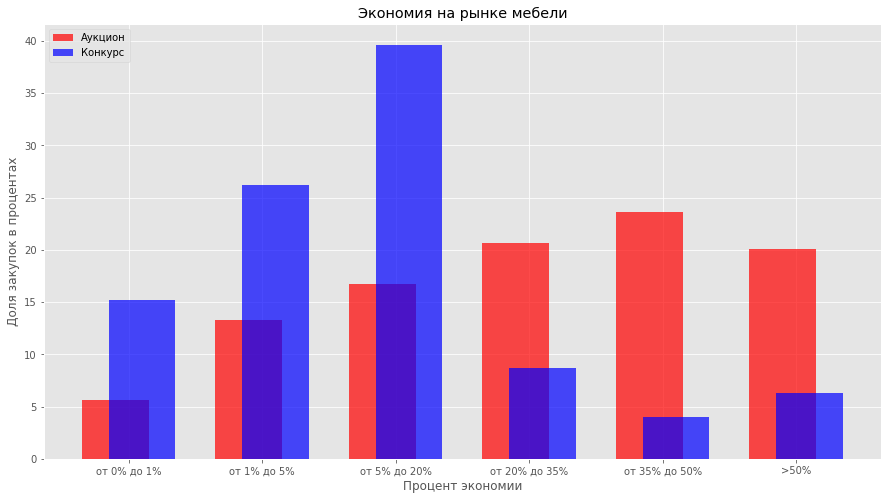

In [24]:
plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
xs = range(6)
plt.bar([x - 0.1 for x in xs], auk1, width = 0.5, color = 'red', alpha = 0.7, label = 'Аукцион',
        zorder = 2)
plt.bar([x + 0.1 for x in xs], kon1, width = 0.5, color = 'blue', alpha = 0.7, label = 'Конкурс',
        zorder = 2)
plt.xticks(xs, ["от 0% до 1%", "от 1% до 5%", "от 5% до 20%", "от 20% до 35%", "от 35% до 50%", ">50%"])
plt.legend(loc='upper left')
plt.title("Экономия на рынке мебели")
plt.xlabel("Процент экономии")
plt.ylabel("Доля закупок в процентах");

We will also build histograms for each case:

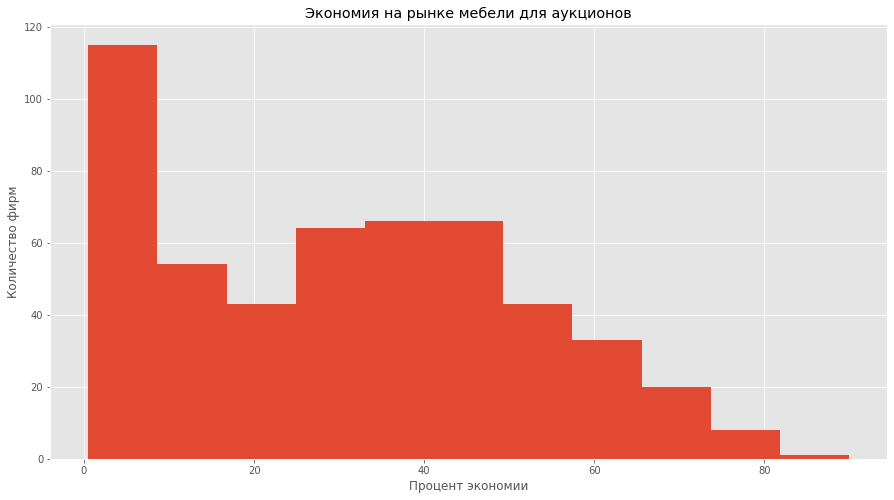

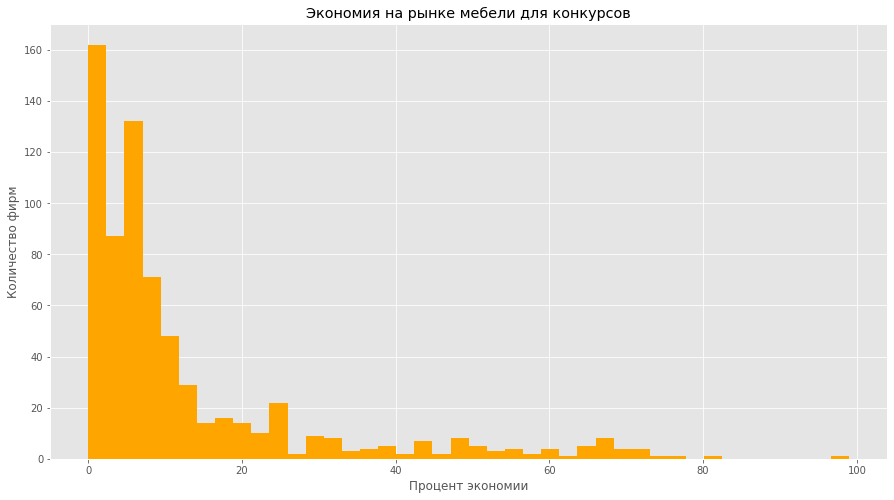

In [37]:
plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.hist(auk['Экономия'], bins='auto')
plt.title("Экономия на рынке мебели для аукционов")
plt.xlabel("Процент экономии")
plt.ylabel("Количество фирм");

plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.hist(kon['Экономия'], bins='auto', color='orange')
plt.title("Экономия на рынке мебели для конкурсов")
plt.xlabel("Процент экономии")
plt.ylabel("Количество фирм");

We will also build graphs for competition in each of the cases, first we will find the average number of participants for each of the groups obtained earlier:

In [27]:
auk2 = [np.mean(np.array(list(auk.query('(0 <= Экономия <= 1)')['Конкуренция']))), np.mean(np.array(list(auk.query('(1 <= Экономия <= 5)')['Конкуренция']))), np.mean(np.array(list(auk.query('(5 <= Экономия <= 20)')['Конкуренция']))), np.mean(np.array(list(auk.query('(20 <= Экономия <= 35)')['Конкуренция']))), np.mean(np.array(list(auk.query('(35 <= Экономия <= 50)')['Конкуренция']))), np.mean(np.array(list(auk.query('(50 <= Экономия)')['Конкуренция'])))]
auk2

[2.0689655172413794,
 2.090909090909091,
 2.784090909090909,
 4.084905660377358,
 5.87603305785124,
 8.12621359223301]

In [28]:
kon2 = [np.mean(np.array(list(kon.query('(0 <= Экономия <= 1)')['Конкуренция']))), np.mean(np.array(list(kon.query('(1 <= Экономия <= 5)')['Конкуренция']))), np.mean(np.array(list(kon.query('(5 <= Экономия <= 20)')['Конкуренция']))), np.mean(np.array(list(kon.query('(20 <= Экономия <= 35)')['Конкуренция']))), np.mean(np.array(list(kon.query('(35 <= Экономия <= 50)')['Конкуренция']))), np.mean(np.array(list(kon.query('(50 <= Экономия)')['Конкуренция'])))]
kon2

[2.2169811320754715,
 2.5425531914893615,
 3.2195945945945947,
 3.8360655737704916,
 3.892857142857143,
 2.6136363636363638]

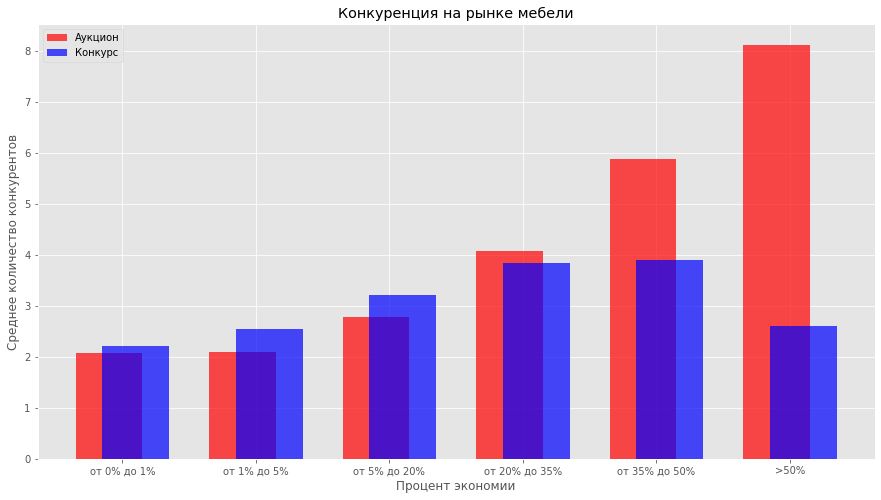

In [38]:
plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
xs = range(6)
plt.bar([x - 0.1 for x in xs], auk2, width = 0.5, color = 'red', alpha = 0.7, label = 'Аукцион',
        zorder = 2)
plt.bar([x + 0.1 for x in xs], kon2, width = 0.5, color = 'blue', alpha = 0.7, label = 'Конкурс',
        zorder = 2)
plt.xticks(xs, ["от 0% до 1%", "от 1% до 5%", "от 5% до 20%", "от 20% до 35%", "от 35% до 50%", ">50%"])
plt.legend(loc='upper left')
plt.title("Конкуренция на рынке мебели")
plt.xlabel("Процент экономии")
plt.ylabel("Среднее количество конкурентов");

# Step

Based on the above graphs, it can be hypothesized that savings and competition have a positive correlation. Let's check this by finding the sample correlation by two procedures:

In [30]:
def correlation(xs, ys): 
    return np.cov(xs, ys)[0][1] / (np.var(xs, ddof=1)**0.5 * np.var(ys, ddof=1)**0.5)

In [31]:
correlation(auk['Экономия'], auk['Конкуренция'])

0.7018181034356439

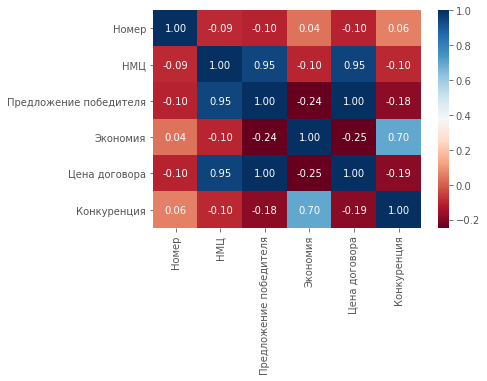

In [32]:
sns.heatmap(auk.corr(), annot=True, fmt='.2f', cmap='RdBu');

In [33]:
correlation(kon['Экономия'], kon['Конкуренция'])

0.13137488915984522

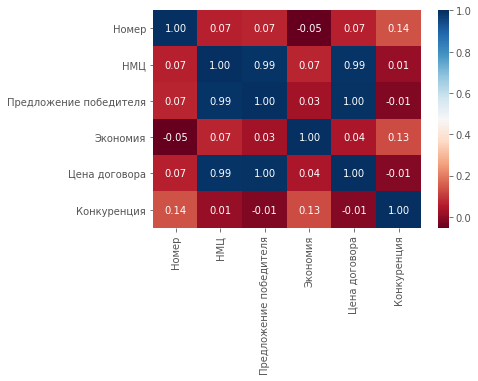

In [34]:
sns.heatmap(kon.corr(), annot=True, fmt='.2f', cmap='RdBu');

Indeed, for auctions, the correlation between savings and competition turned out to be quite large, but for competitions it is much smaller, but still present, which is explained by differences in the design of the procedures themselves.

It is also possible to put forward a hypothesis that if we take a random competition, then the most likely savings in it are from 0 to 10%, we calculate the mode and other characteristics of the samples:

In [35]:
auk.describe()

,Номер,НМЦ,Предложение победителя,Экономия,Цена договора,Конкуренция
count,5.130000e+02,5.130000e+02,5.130000e+02,513.000000,5.130000e+02,513.000000
mean,4.346137e+17,2.554513e+06,1.854005e+06,30.277219,1.914836e+06,4.727096
std,1.989928e+17,4.670438e+06,3.912015e+06,21.441416,3.930350e+06,3.050292
min,1.483000e+17,4.553330e+03,3.601230e+03,0.500000,3.601230e+03,2.000000
25%,3.731001e+17,4.498850e+05,2.559791e+05,10.500005,2.725137e+05,2.000000
50%,3.732000e+17,1.133281e+06,6.871900e+05,30.587504,7.500000e+05,4.000000
75%,3.732003e+17,2.743200e+06,1.843715e+06,45.976940,1.911680e+06,6.000000
max,8.951000e+17,4.995588e+07,4.970610e+07,89.980103,4.970610e+07,22.000000


In [36]:
kon.describe()

,Номер,НМЦ,Предложение победителя,Экономия,Цена договора,Конкуренция
count,6.990000e+02,6.990000e+02,6.990000e+02,699.000000,6.990000e+02,699.000000
mean,3.707011e+17,1.529918e+07,1.360526e+07,12.627217,1.384406e+07,2.942775
std,1.926954e+17,2.915115e+07,2.470809e+07,16.843983,2.517595e+07,1.545727
min,1.482000e+17,1.481927e+05,1.481930e+03,0.000000,1.481930e+03,0.000000
25%,1.732000e+17,2.701606e+06,2.278429e+06,2.998509,2.278429e+06,2.000000
50%,3.731001e+17,6.057000e+06,5.297035e+06,6.250975,5.297035e+06,3.000000
75%,3.732001e+17,1.634945e+07,1.497794e+07,13.550000,1.507064e+07,4.000000
max,8.735000e+17,5.000000e+08,3.771991e+08,98.999998,3.771991e+08,13.000000


Indeed, the competition savings mode = 6.25%, and it is 2 times less than the arithmetic mean, in contrast to auctions where these parameters are equal.